In [1]:
import os

import numpy as np
import scipy as sp
from scipy import misc, stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from pandas import DataFrame, Series


%matplotlib inline

In [2]:
MAIN_TAG = '2007'
DIRNAME_TAGS = '../data/tags'
DIRNAME_IMAGES = '../data/images'

COLOR = {'red': 0,
         'green': 1,
         'blue': 2}

In [3]:
with open('../data/Dataset_test_sasha.txt') as f:
    image_names = [int(name) for name in f.readlines()]

In [4]:
len(image_names)

1001

In [5]:
Y = Series()
for name in image_names:
    with open(os.path.join(DIRNAME_TAGS, 'tags%d.txt' % (name,))) as file:
        set_tags = set(tag.strip() for tag in file.readlines())
        #print('tags%d.txt' % (name,), '  ',set_tags)
        Y.set_value(name, int(MAIN_TAG in set_tags))
Y = pd.DataFrame(Y, columns=['target'])

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [6]:
Y['target'].value_counts()

0    949
1     32
Name: target, dtype: int64

In [7]:
Y.head()

,target
16018,0
2832,0
10328,0
16071,0
22284,1


## Static data

In [8]:
data_static = DataFrame()
num = 0
d = []
for image_name in image_names:
    image = np.array(Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_name))))
    data = []
    for name, num in COLOR.items():
        a = image[:, :, num].ravel()
        data.extend([np.mean(a), np.var(a), sp.stats.skew(a), sp.stats.kurtosis(a)])
    d.append([image_name, *data])
    

data_static = pd.DataFrame.from_records(d)
data_static = data_static.rename(columns={0: 'name'}).set_index('name')

In [9]:
data_static.head()

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
16018,40.377216,883.291025,0.689875,0.047451,45.580790,1024.438924,0.615814,0.421079,41.468431,897.363995,0.789478,0.399050
2832,150.513370,6697.562253,-0.194264,-1.268727,154.111294,6726.445485,-0.251882,-1.278983,153.781394,6214.021990,-0.219189,-1.224572
10328,126.393717,2457.869925,-0.830455,-0.891233,106.175979,7265.348274,0.583531,-1.434889,121.656235,4209.820332,-0.930703,-0.735921
16071,117.549232,3487.788291,-0.408510,-0.722427,68.568731,1354.069329,-0.415416,-1.155102,155.734336,5471.229412,-0.484947,-0.882227
22284,120.996042,6615.277876,-0.160313,-1.455343,105.647718,5578.253765,0.021974,-1.432003,132.356751,6317.783450,-0.408834,-1.263383


In [10]:
data_static.shape

(1001, 12)

## SPAM data

In [11]:
DIRNAME_SPAM_RESULT = "../data/spam_result_test"

In [12]:
d = []
for image_name in os.listdir(DIRNAME_SPAM_RESULT):
    with open(os.path.join(DIRNAME_SPAM_RESULT, image_name)) as f:
        data = [float(x.strip()) for x in f.readlines()]
        d.append([int(image_name[:-4]), *data])
        
data_spam = pd.DataFrame.from_records(d)
data_spam = data_spam.rename(columns={0: 'name'}).set_index('name')

In [13]:
data_spam.shape

(981, 686)

In [14]:
data_spam.head()

,1,2,3,4,5,6,7,8,9,10,...,677,678,679,680,681,682,683,684,685,686
name,,,,,,,,,,,,,,,,,,,,,
5520,0.023144,0.002780,0.003028,0.003312,0.003290,0.003270,0.040415,0.002348,0.000573,0.000711,...,0.000470,0.000398,0.002502,0.048288,0.002763,0.002723,0.002701,0.002496,0.002343,0.028076
13733,0.074379,0.007511,0.007439,0.007544,0.006287,0.005431,0.041573,0.004735,0.001352,0.001568,...,0.001157,0.001039,0.005296,0.049513,0.005057,0.005640,0.006336,0.006437,0.006435,0.088571
6628,0.024214,0.002027,0.002458,0.004082,0.002907,0.002870,0.058626,0.001288,0.000368,0.000491,...,0.000549,0.000334,0.001492,0.053561,0.001994,0.001960,0.002336,0.001587,0.001353,0.024919
22519,0.012517,0.001237,0.001402,0.001911,0.003029,0.001515,0.016495,0.000902,0.000238,0.000311,...,0.000342,0.000245,0.001035,0.019838,0.001778,0.001827,0.003389,0.001589,0.001277,0.013564
24841,0.034370,0.003543,0.003887,0.004012,0.004157,0.004338,0.046365,0.003620,0.000647,0.000787,...,0.000782,0.000696,0.003741,0.047439,0.004136,0.004202,0.004606,0.004146,0.003732,0.041755


## CCPEV data 

In [15]:
DIRNAME_CCPEV_RESULT = "../data/result_ccpev"

In [16]:
d = []
for image_name in os.listdir(DIRNAME_CCPEV_RESULT):
    with open(os.path.join(DIRNAME_CCPEV_RESULT, image_name)) as f:
        data = [float(x) for x in f.read().split(',')]
        d.append([int(image_name[:-4]), *data])
        
data_ccpev = pd.DataFrame.from_records(d)
data_ccpev = data_ccpev.rename(columns={0: 'name'}).set_index('name')

In [17]:
data_ccpev.head()

,1,2,3,4,5,6,7,8,9,10,...,539,540,541,542,543,544,545,546,547,548
name,,,,,,,,,,,,,,,,,,,,,
21288,0.017506,0.023251,0.034502,0.055507,0.10545,0.23466,0.10738,0.054543,0.034109,0.023065,...,0.044561,0.71320,0.23506,0.116660,0.043553,0.021003,0.030065,0.058441,0.088871,0.28820
19938,0.011013,0.015799,0.023535,0.041039,0.10975,0.43324,0.10970,0.040078,0.023989,0.016137,...,0.047414,0.69640,0.20331,0.099627,0.027134,0.007200,0.017026,0.043794,0.067151,0.27438
21463,0.010375,0.014657,0.021796,0.039110,0.10741,0.44238,0.10570,0.038950,0.021388,0.013789,...,0.048925,0.72213,0.21206,0.095735,0.025594,0.007388,0.016516,0.045330,0.074982,0.29164
15105,0.016126,0.022749,0.032728,0.052917,0.10352,0.29539,0.10527,0.053920,0.032775,0.022190,...,0.044919,0.73189,0.23588,0.110610,0.040022,0.014826,0.026872,0.054350,0.081363,0.25290
7377,0.008774,0.012287,0.018730,0.032537,0.11059,0.50990,0.10889,0.033647,0.018544,0.011962,...,0.050974,0.72848,0.19546,0.096967,0.022999,0.005253,0.013599,0.042503,0.066364,0.24925


In [18]:
data_ccpev.shape

(4526, 548)

# Learning

In [19]:
import itertools

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [20]:
N = 10

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

## Static

In [22]:
X = data_static.copy()

df = Y.join(X, how='inner')
df = df.drop_duplicates()

y = df['target']
X = df.drop('target', axis=1)

Normalized confusion matrix
[[ 0.99873817  0.00126183]
 [ 0.99354839  0.00645161]]


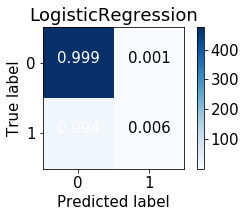

Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]


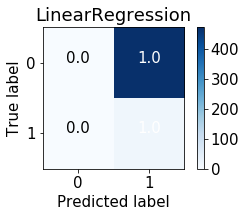

Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


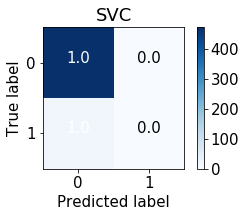

In [23]:
for c in (LogisticRegression, LinearRegression, SVC):
    cls = c()
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test)
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                          title=c.__name__)
    plt.savefig("static_" + c.__name__ + ".png")
    plt.show()
    #print(cnf_matrix)

## SPAM

In [24]:
X = data_spam.copy()

df = Y.join(X, how='inner')
df = df.drop_duplicates()

y = df['target']
X = df.drop('target', axis=1)

Normalized confusion matrix
[[ 0.97216951  0.02783049]
 [ 0.98802395  0.01197605]]


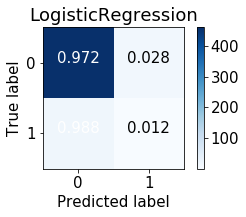

[[  4.61100000e+02   1.32000000e+01]
 [  1.65000000e+01   2.00000000e-01]]
Normalized confusion matrix
[[ 0.96616936  0.03383064]
 [ 0.98013245  0.01986755]]


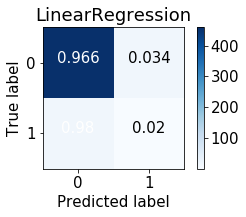

[[  4.59800000e+02   1.61000000e+01]
 [  1.48000000e+01   3.00000000e-01]]
Normalized confusion matrix
[[ 0.9740889   0.0259111 ]
 [ 0.95705521  0.04294479]]


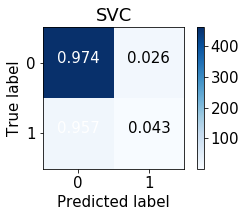

[[ 462.4   12.3]
 [  15.6    0.7]]


In [25]:
for c in (LogisticRegression, LinearRegression, SVC):
    cls = LinearRegression(n_jobs=-1)
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test).astype(int)
        #print(y_predict)
   
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int))) # .astype(int)
    #print(confusion_matrix(y_test, y_predict.astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                              title=c.__name__)
    plt.savefig("spam" + c.__name__ + ".png")
    plt.show()
    print(cnf_matrix)

## CCPEV

In [26]:
X = data_ccpev.copy()

df = Y.join(X, how='inner')
df = df.drop_duplicates()

y = df['target']
X = df.drop('target', axis=1)

Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


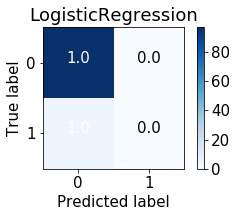

Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]


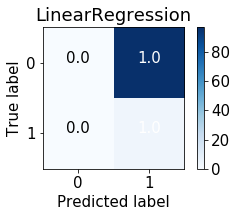

Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


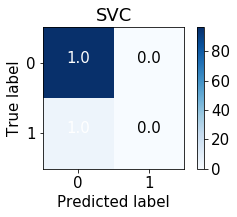

In [27]:
for c in (LogisticRegression, LinearRegression, SVC):
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls = c()
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test)
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int)))
    #print(confusion_matrix(y_test, y_predict.astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                              title=c.__name__)
    plt.savefig("ccpev_" + c.__name__ + ".png")
    plt.show()
    #print(cnf_matrix)